In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [46]:
import os
import pandas as pd
from termcolor import colored
import numpy as np
import matplotlib.pyplot as plt
from natsort import natsorted

In [ ]:
def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

In [50]:
results_folder = os.path.join(os.getcwd(), "results")

In [55]:
exp_dict = {}

for experiment in sorted(os.listdir(results_folder)):
    print(colored("Experiment:", 'red'),experiment)
    exp_dict[experiment] = {}
    timeout=-1
    for timeout_folder in natsorted(os.listdir(os.path.join(results_folder, experiment))):
        print(colored("\tTimeout folder:", 'blue'),timeout_folder)
        parameters = timeout_folder.split("_")
        
#         print("parameters[0]",parameters[0])
            
        for param in parameters:
            if param.startswith("timeout"):
                timeout = int(param.split("#")[-1]) * 10
                print("\ttimeout:",timeout*10)
                
        if timeout == -1:
            print(colored("\tWARNING: wrong timeout folder", 'green'))
            continue
            
        exp_dict[experiment][timeout] = {}
        completed_areas = np.array([])
        for filename in os.listdir(os.path.join(results_folder, experiment, timeout_folder)):
            if filename.endswith("taskLOG_client.tsv"):
#                 print("\t\tFilename:",filename)
                if not os.path.getsize(os.path.join(results_folder, experiment, timeout_folder, filename)) > 0:
                    print(colored("\tWARNING, empty file at:" + os.path.join(timeout_folder, filename), 'red'))
                    completed_areas = np.append(completed_areas, 0)
                    continue
                
#                 print("\tPath:", os.path.join(results_folder, experiment, timeout_folder, filename))
                df = pd.read_csv(os.path.join(results_folder, experiment, timeout_folder, filename), sep="\t", header=None)
                completed_areas = np.append(completed_areas, df.shape[0])
        
        exp_dict[experiment][timeout] = completed_areas
#         print("exp_dict:",exp_dict)

Experiment: homogeneous_blue_exp
	Timeout folder: blue_2021-04-23_robots#16_timeout#3_redAreas#0_1800seconds
	timeout: 300
	Timeout folder: blue_2021-04-23_robots#16_timeout#9_redAreas#0_1800seconds
	timeout: 900
	Timeout folder: blue_2021-04-23_robots#16_timeout#15_redAreas#0_1800seconds
	timeout: 1500
	Timeout folder: blue_2021-04-23_robots#16_timeout#21_redAreas#0_1800seconds
	timeout: 2100
	Timeout folder: blue_2021-04-23_robots#16_timeout#24_redAreas#0_1800seconds
	timeout: 2400
	Timeout folder: blue_2021-04-24_robots#16_timeout#30_redAreas#0_1800seconds
	timeout: 3000
	Timeout folder: blue_2021-04-24_robots#16_timeout#36_redAreas#0_1800seconds
	timeout: 3600
	Timeout folder: blue_2021-04-24_robots#16_timeout#42_redAreas#0_1800seconds
	timeout: 4200
	Timeout folder: blue_2021-04-24_robots#16_timeout#54_redAreas#0_1800seconds
	timeout: 5400
	Timeout folder: blue_2021-04-24_robots#16_timeout#60_redAreas#0_1800seconds
	timeout: 6000
	Timeout folder: blue_2021-04-24_robots#16_timeout#

	Timeout folder: red_2021-04-23_robots#48_timeout#15_redAreas#8_1800seconds
	timeout: 1500
	Timeout folder: red_2021-04-23_robots#48_timeout#21_redAreas#8_1800seconds
	timeout: 2100
	Timeout folder: red_2021-04-23_robots#48_timeout#24_redAreas#8_1800seconds
	timeout: 2400
	Timeout folder: red_2021-04-23_robots#48_timeout#30_redAreas#8_1800seconds
	timeout: 3000
	Timeout folder: red_2021-04-23_robots#48_timeout#36_redAreas#8_1800seconds
	timeout: 3600
	Timeout folder: red_2021-04-24_robots#48_timeout#42_redAreas#8_1800seconds
	timeout: 4200
	Timeout folder: red_2021-04-24_robots#48_timeout#54_redAreas#8_1800seconds
	timeout: 5400
	Timeout folder: red_2021-04-24_robots#48_timeout#60_redAreas#8_1800seconds
	timeout: 6000
	Timeout folder: red_2021-04-24_robots#48_timeout#75_redAreas#8_1800seconds
	timeout: 7500
	Timeout folder: red_2021-04-24_robots#48_timeout#90_redAreas#8_1800seconds
	timeout: 9000
	Timeout folder: red_2021-04-24_robots#48_timeout#135_redAreas#8_1800seconds
	timeout: 135

In [52]:
# for key, values in exp_dict.items():
#     print(key, '\n', values)

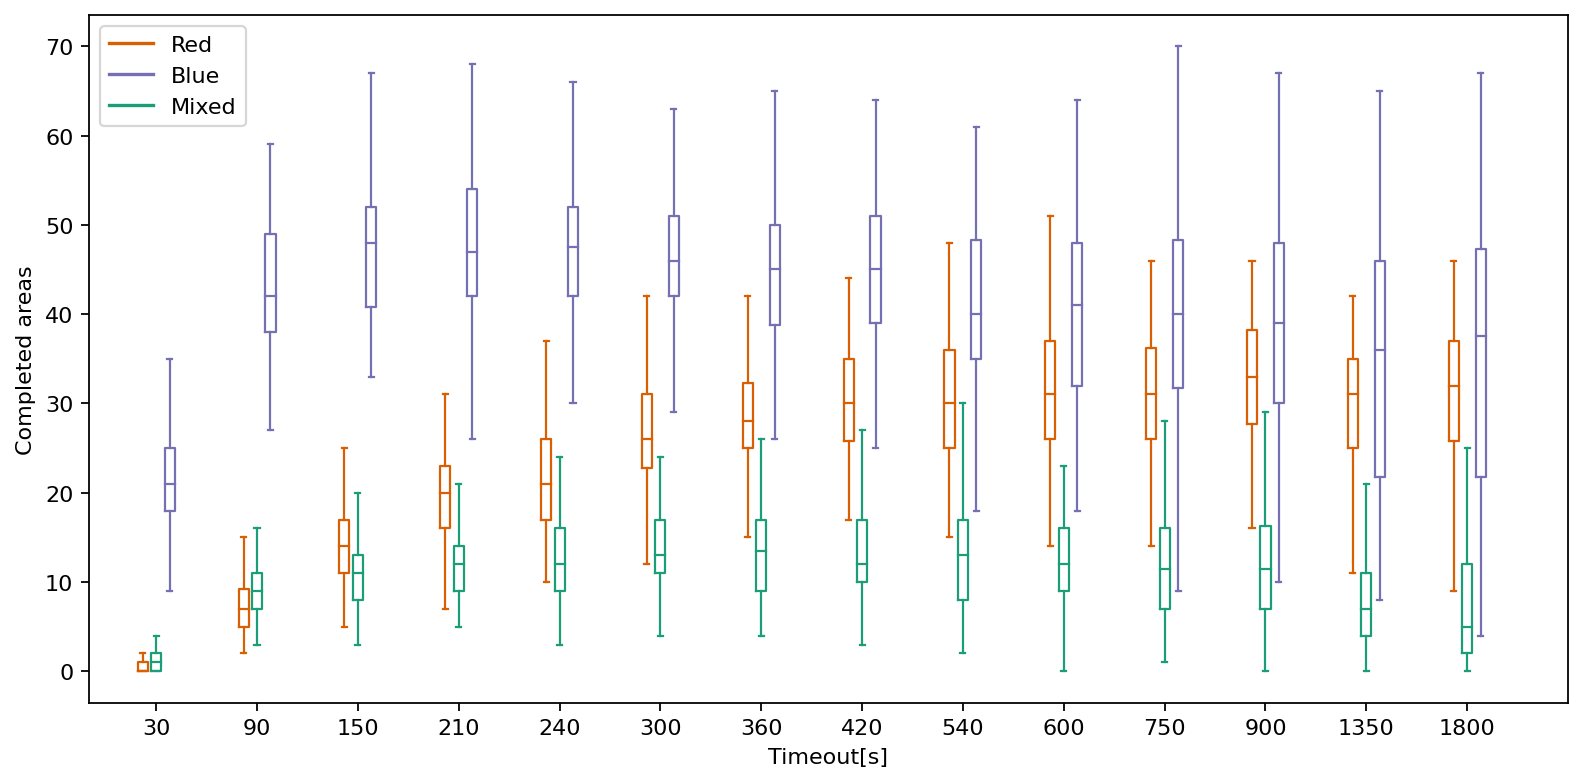

In [57]:
red = exp_dict['homogeneous_red_exp']
blue = exp_dict['homogeneous_blue_exp']
mixed = exp_dict['mixed_exp']

ticks = mixed.keys()

fig, ax = plt.subplots(figsize=(10, 5), dpi=160)

bpl = plt.boxplot(red.values(), positions=np.array(range(len(red.values())))*3.0-0.4, sym='', widths=0.3)
bpr = plt.boxplot(blue.values(), positions=np.array(range(len(blue.values())))*3.0+0.4, sym='', widths=0.3)
bpc = plt.boxplot(mixed.values(), positions=np.array(range(len(mixed.values())))*3.0, sym='', widths=0.3)

set_box_color(bpl, '#d95f02') # colors are from http://colorbrewer2.org/
set_box_color(bpr, '#7570b3')
set_box_color(bpc, '#1b9e77')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='#d95f02', label='Red')
plt.plot([], c='#7570b3', label='Blue')
plt.plot([], c='#1b9e77', label='Mixed')
plt.legend(loc=2)

# plt.xticks(range(0, 300, 5), ticks)
# plt.xlim(-3, len(ticks)*3)
# plt.ylim(0, 80)
plt.xticks(range(0, len(ticks) * 3, 3), ticks)
plt.xlim(-2, len(ticks)*3)

ax.set_xticklabels(mixed.keys())
ax.set_xlabel("Timeout[s]")
ax.set_ylabel("Completed areas")

plt.tight_layout()
plt.savefig('exp_compare.png')